# Problem Statement

Choose any website on the internet and do some research on how to extract text and perform sentiment analysis

## We will extract Reivew of Echo Dot (3rd Gen)

------------------------------ ### -----------------------------

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [37]:
echo_reviews = []  # Creatina blank list

In [38]:
for i in range(1,31): # Range to go over 30 pages of reviews
    ip=[]
    url = "https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    
    echo_reviews=echo_reviews+ip


In [39]:
with open('echo.txt', 'w', encoding='utf-8') as output:
    output.write(str(echo_reviews))

In [40]:
ip_rev_string = " ".join(echo_reviews)

In [41]:
ip_rev_string

'\n\n  This is very good hardware and speaker. However very much handicapped by amazon on software front. It can not understand your commands 70-80 percentage times and very limited to amazon music and saavn. However you can not use any of good music apps like wynk, gaana, youtube etc.Also natural language processing is supported in google products but not in this echo.For example when you say-1) where is agra - it gives you correct answer.2) continue with next query like how to reach there ?Then for 2nd query it doesn\'t know what to do..This is just an example but most of the times you will find this issue there.Then you can not connect with other populer music etc apps. Have to rely on what amazon thinks os good for you.Amazon music has very limited music base.So looking forward to get more access and integration with alexa however not have much hope since its already such an old plateform that they would have given support if there were any such plans.\n\n \n\n  It definitely has b

In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords

In [42]:
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [43]:
ip_review_words = ip_rev_string.split(" ")

In [44]:
ip_review_words

['',
 'this',
 'is',
 'very',
 'good',
 'hardware',
 'and',
 'speaker',
 'however',
 'very',
 'much',
 'handicapped',
 'by',
 'amazon',
 'on',
 'software',
 'front',
 'it',
 'can',
 'not',
 'understand',
 'your',
 'commands',
 'percentage',
 'times',
 'and',
 'very',
 'limited',
 'to',
 'amazon',
 'music',
 'and',
 'saavn',
 'however',
 'you',
 'can',
 'not',
 'use',
 'any',
 'of',
 'good',
 'music',
 'apps',
 'like',
 'wynk',
 'gaana',
 'youtube',
 'etc',
 'also',
 'natural',
 'language',
 'processing',
 'is',
 'supported',
 'in',
 'google',
 'products',
 'but',
 'not',
 'in',
 'this',
 'echo',
 'for',
 'example',
 'when',
 'you',
 'say',
 'where',
 'is',
 'agra',
 'it',
 'gives',
 'you',
 'correct',
 'answer',
 'continue',
 'with',
 'next',
 'query',
 'like',
 'how',
 'to',
 'reach',
 'there',
 'then',
 'for',
 'nd',
 'query',
 'it',
 'doesn',
 't',
 'know',
 'what',
 'to',
 'do',
 'this',
 'is',
 'just',
 'an',
 'example',
 'but',
 'most',
 'of',
 'the',
 'times',
 'you',
 'will',
 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
vectorizer = TfidfVectorizer(ip_review_words, use_idf=True, ngram_range=(1,3))
X = vectorizer.fit_transform(ip_review_words)

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['', 'this', 'is', 'very', 'good', 'hardware', 'and', 'speaker', 'however', 'very', 'much', 'handicapped', 'by', 'amazon', 'on', 'software', 'front', 'it', 'can', 'not', 'understand', 'your', 'commands', 'percentage', 'times', 'and', 'very', 'limited', 'to', 'amazon', 'music', 'and', 'saavn', 'however', 'you', 'can', 'not', 'use', 'any', 'of', 'good', 'music', 'apps', 'like', 'wynk', 'gaana', 'youtube', 'etc', 'also', 'natural', 'language', 'processing', 'is', 'supported', 'in', 'google', 'products', 'but', 'not', 'in', 'this', 'echo', 'for', 'example', 'when', 'you', 'say', 'where', 'is', 'agra', 'it', 'gives', 'you', 'correct', 'answer', 'continue', 'with', 'next', 'query', 'like', 'how', 'to', 'reach', 'there', 'then', 'for', 'nd', 'query', 'it', 'doesn', 't', 'know', 'what', 'to', 'do', 'this', 'is', 'just', 'an', 'example', 'but', 'most', 'of', 'the', 'times', 'you', 'will', 'find'

In [46]:
with open("stopwords_en.txt","r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("/n")
stop_words

["a\na's\nable\nabout\nabove\naccording\naccordingly\nacross\nactually\nafter\nafterwards\nagain\nagainst\nain't\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\napart\nappear\nappreciate\nappropriate\nare\naren't\naround\nas\naside\nask\nasking\nassociated\nat\navailable\naway\nawfully\nb\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelieve\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nboth\nbrief\nbut\nby\nc\nc'mon\nc's\ncame\ncan\ncan't\ncannot\ncant\ncause\ncauses\ncertain\ncertainly\nchanges\nclearly\nco\ncom\ncome\ncomes\nconcerning\nconsequently\nconsider\nconsidering\ncontain\ncontaining\ncontains\ncorresponding\ncould\ncouldn't\ncourse\ncurrently\nd\ndefinitely\ndescribed\ndespite\ndid\ndidn't\ndifferent\ndo\ndoes\ndoesn't\ndoing\ndon't\ndone\ndown\ndownwards\nduring\ne\neach\nedu\neg\neight\n

In [47]:
ip_review_words = [w for w in ip_review_words if not w in stop_words]
ip_review_words

['',
 'this',
 'is',
 'very',
 'good',
 'hardware',
 'and',
 'speaker',
 'however',
 'very',
 'much',
 'handicapped',
 'by',
 'amazon',
 'on',
 'software',
 'front',
 'it',
 'can',
 'not',
 'understand',
 'your',
 'commands',
 'percentage',
 'times',
 'and',
 'very',
 'limited',
 'to',
 'amazon',
 'music',
 'and',
 'saavn',
 'however',
 'you',
 'can',
 'not',
 'use',
 'any',
 'of',
 'good',
 'music',
 'apps',
 'like',
 'wynk',
 'gaana',
 'youtube',
 'etc',
 'also',
 'natural',
 'language',
 'processing',
 'is',
 'supported',
 'in',
 'google',
 'products',
 'but',
 'not',
 'in',
 'this',
 'echo',
 'for',
 'example',
 'when',
 'you',
 'say',
 'where',
 'is',
 'agra',
 'it',
 'gives',
 'you',
 'correct',
 'answer',
 'continue',
 'with',
 'next',
 'query',
 'like',
 'how',
 'to',
 'reach',
 'there',
 'then',
 'for',
 'nd',
 'query',
 'it',
 'doesn',
 't',
 'know',
 'what',
 'to',
 'do',
 'this',
 'is',
 'just',
 'an',
 'example',
 'but',
 'most',
 'of',
 'the',
 'times',
 'you',
 'will',
 

In [48]:
ip_review_string = " ".join(ip_review_words)
ip_review_string

' this is very good hardware and speaker however very much handicapped by amazon on software front it can not understand your commands percentage times and very limited to amazon music and saavn however you can not use any of good music apps like wynk gaana youtube etc also natural language processing is supported in google products but not in this echo for example when you say where is agra it gives you correct answer continue with next query like how to reach there then for nd query it doesn t know what to do this is just an example but most of the times you will find this issue there then you can not connect with other populer music etc apps have to rely on what amazon thinks os good for you amazon music has very limited music base so looking forward to get more access and integration with alexa however not have much hope since its already such an old plateform that they would have given support if there were any such plans it definitely has better speakers than eco dot gen and goog

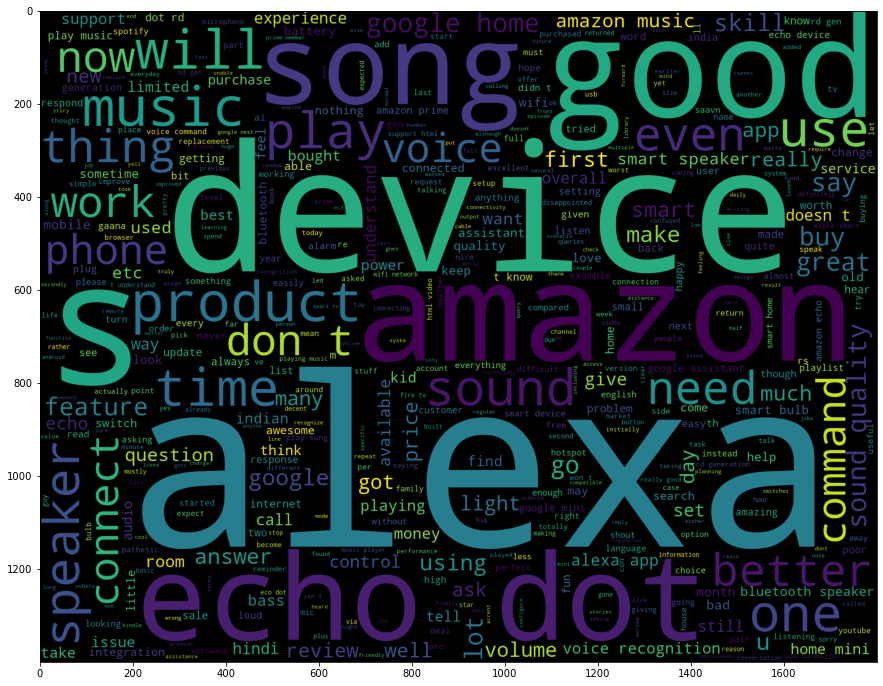

In [49]:
plt.rcParams['figure.figsize']=(15,20)
wordcloud_ip = WordCloud(
                      background_color='Black',
                      width=1800,
                      height=1400,
                      max_words=500,
                      ).generate(ip_review_string)

plt.imshow(wordcloud_ip)

Extending our stop words to include some words which we feel like needs to be excluded

In [56]:
stop_words.extend(["i","got","fossil","amazon","u","ask","dont","think","t","now","lot","n","soo","watch","product","a","s","to",
                  "ok","u","it","so","this","is","at", "don","in","one","the","of","any","not","he","she","am","by","you","the","and","as","do","its",
                  "for","as","has","if","my","till","there","can","get","or","on","k", "as",'echo','alexa','one','device','now',
                  'will','echo','dot','give','even','very','much','well','eco','devices','some','very','up','th','no','etc','feels',
                  'totally','also'])

In [57]:
ip_review_words = [w for w in ip_review_words if not w in stop_words]

In [58]:
ip_review_string = " ".join(ip_review_words)
ip_review_string

' good hardware speaker however handicapped software front understand your commands percentage times limited music saavn however use good music apps like wynk gaana youtube natural language processing supported google products but example when say where agra gives correct answer continue with next query like how reach then nd query doesn know what just an example but most times find issue then connect with other populer music apps have rely what thinks os good music limited music base looking forward more access integration with however have hope since already such an old plateform that they would have given support were such plans definitely better speakers than gen google home mini but sound recognition poor compared google home mini previous maybe something with cost cutting going with only far field microphones instead but due poor recognition takes time sometimes minutes does nothing which definitely takes away experience unfortunately return but google home mini miles ahead bette

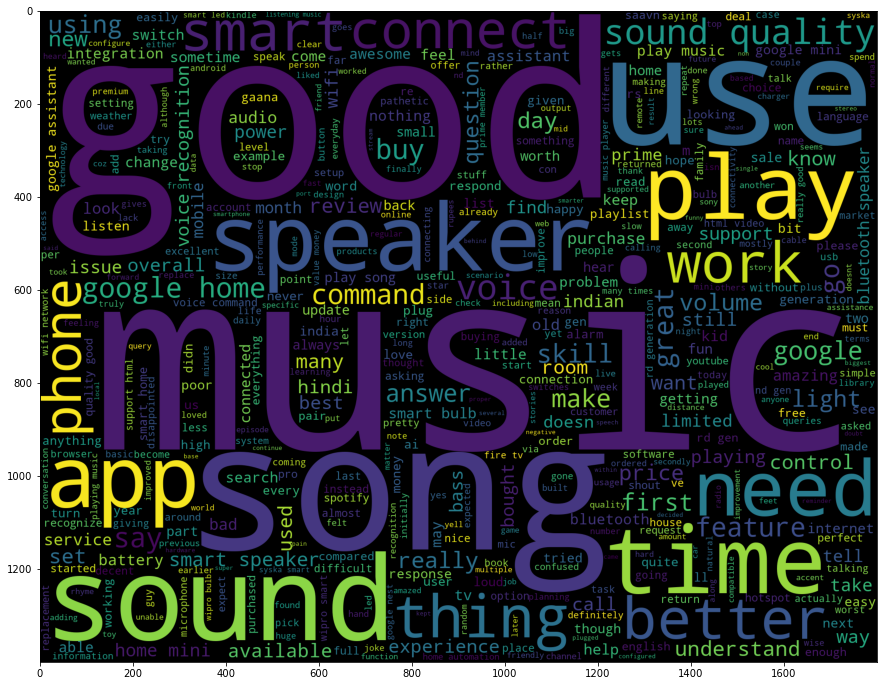

In [59]:
plt.rcParams['figure.figsize']=(15,20)
wordcloud_ip = WordCloud(
                      background_color='Black',
                      width=1800,
                      height=1400,
                      max_words=500,
                      ).generate(ip_review_string)

plt.imshow(wordcloud_ip)

# Positive Words

In [60]:
with open("positive-words.txt", "r") as pos:
    poswords = pos.read().split("\n")

In [61]:
ip_pos_in_pos = " ".join([w for w in ip_review_words if w in poswords])
ip_pos_in_pos

'good good like supported correct like good support better better support nice smart super smart happy pretty good good decent available useful amazed love advantage support amazing amazing love amazed advantage great better pros improved integrated smart free smart compatible honest smarter better decent richer cheaper works smart fantastic support works great smart fun happier sophisticated support best works fast good work smart smart worth support easy proper available better improves compatible smartly amazing better great worth work smarter good smart smart enough gifted happily willing worth better smart smart smart helpful good good friendly free like better capable worked fast good good impressed like liked cool smart enjoyed easy skill like supportive like work pros awesome cute usable like incredible better crisp clear rich wonderful useful better good wise better good boom like superior good good nifty convenient easy warm enough good good like good witty best good smart co

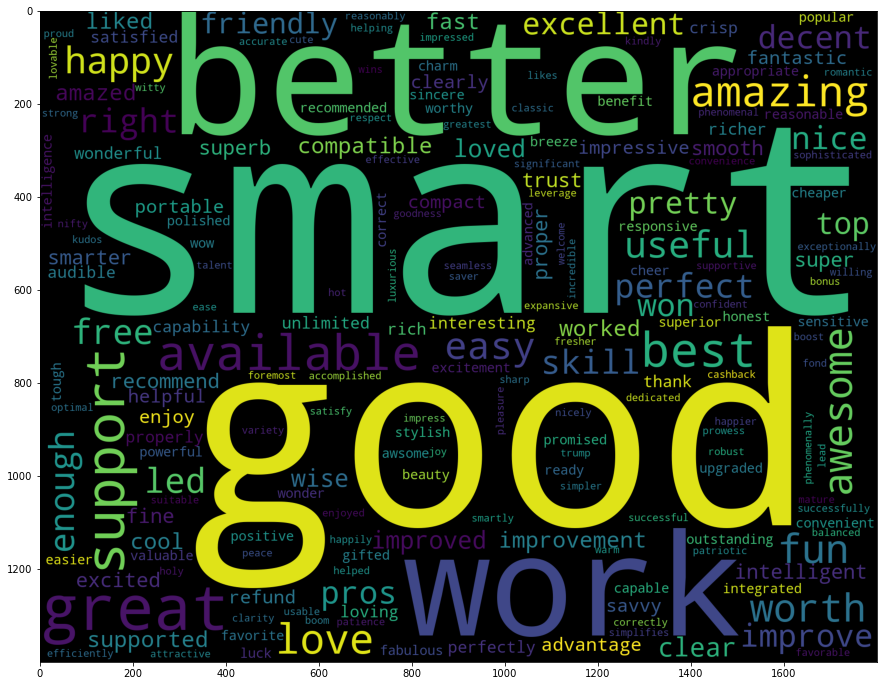

In [62]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='Black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)

# Negative Words

In [63]:
with open('negative-words.txt',"r") as neg:
    negwords = neg.read().split('\n')

In [64]:
ip_neg_in_neg = " ".join([w for w in ip_review_words if w in negwords])

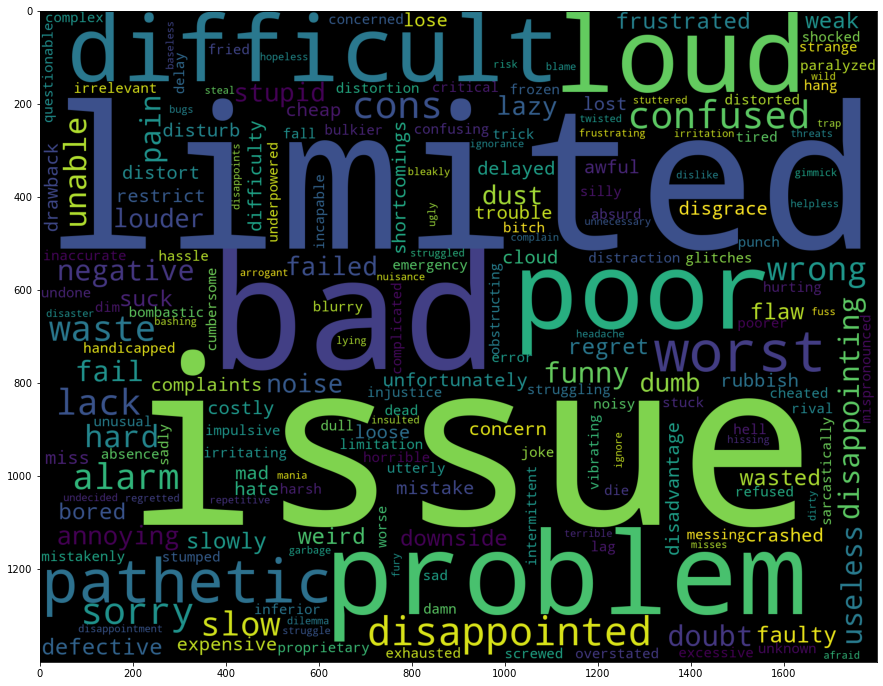

In [65]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg_in_neg)

# Bigram Word Cloud

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaich\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
WNL = nltk.WordNetLemmatizer()

In [68]:
text = ip_review_string.lower()

In [69]:
text

' good hardware speaker however handicapped software front understand your commands percentage times limited music saavn however use good music apps like wynk gaana youtube natural language processing supported google products but example when say where agra gives correct answer continue with next query like how reach then nd query doesn know what just an example but most times find issue then connect with other populer music apps have rely what thinks os good music limited music base looking forward more access integration with however have hope since already such an old plateform that they would have given support were such plans definitely better speakers than gen google home mini but sound recognition poor compared google home mini previous maybe something with cost cutting going with only far field microphones instead but due poor recognition takes time sometimes minutes does nothing which definitely takes away experience unfortunately return but google home mini miles ahead bette

In [70]:
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [71]:
text_content = [s for s in text1 if len(s) !=0]
text_content = [WNL.lemmatize(t) for t in text1]
text_content

['good',
 'hardware',
 'speaker',
 'however',
 'handicapped',
 'software',
 'front',
 'understand',
 'your',
 'command',
 'percentage',
 'time',
 'limited',
 'music',
 'saavn',
 'however',
 'use',
 'good',
 'music',
 'apps',
 'like',
 'wynk',
 'gaana',
 'youtube',
 'natural',
 'language',
 'processing',
 'supported',
 'google',
 'product',
 'but',
 'example',
 'when',
 'say',
 'where',
 'agra',
 'give',
 'correct',
 'answer',
 'continue',
 'with',
 'next',
 'query',
 'like',
 'how',
 'reach',
 'then',
 'nd',
 'query',
 'doesn',
 'know',
 'what',
 'just',
 'an',
 'example',
 'but',
 'most',
 'time',
 'find',
 'issue',
 'then',
 'connect',
 'with',
 'other',
 'populer',
 'music',
 'apps',
 'have',
 'rely',
 'what',
 'think',
 'o',
 'good',
 'music',
 'limited',
 'music',
 'base',
 'looking',
 'forward',
 'more',
 'access',
 'integration',
 'with',
 'however',
 'have',
 'hope',
 'since',
 'already',
 'such',
 'an',
 'old',
 'plateform',
 'that',
 'they',
 'would',
 'have',
 'given',
 'sup

In [72]:
#nltk_tokens = nltk.word_tokenize(text1)
bigram_list = list(nltk.bigrams(text_content))
print(bigram_list)

[('good', 'hardware'), ('hardware', 'speaker'), ('speaker', 'however'), ('however', 'handicapped'), ('handicapped', 'software'), ('software', 'front'), ('front', 'understand'), ('understand', 'your'), ('your', 'command'), ('command', 'percentage'), ('percentage', 'time'), ('time', 'limited'), ('limited', 'music'), ('music', 'saavn'), ('saavn', 'however'), ('however', 'use'), ('use', 'good'), ('good', 'music'), ('music', 'apps'), ('apps', 'like'), ('like', 'wynk'), ('wynk', 'gaana'), ('gaana', 'youtube'), ('youtube', 'natural'), ('natural', 'language'), ('language', 'processing'), ('processing', 'supported'), ('supported', 'google'), ('google', 'product'), ('product', 'but'), ('but', 'example'), ('example', 'when'), ('when', 'say'), ('say', 'where'), ('where', 'agra'), ('agra', 'give'), ('give', 'correct'), ('correct', 'answer'), ('answer', 'continue'), ('continue', 'with'), ('with', 'next'), ('next', 'query'), ('query', 'like'), ('like', 'how'), ('how', 'reach'), ('reach', 'then'), ('t

In [73]:
dictionary2 = [' '.join(tup) for tup in bigram_list]
print (dictionary2)

['good hardware', 'hardware speaker', 'speaker however', 'however handicapped', 'handicapped software', 'software front', 'front understand', 'understand your', 'your command', 'command percentage', 'percentage time', 'time limited', 'limited music', 'music saavn', 'saavn however', 'however use', 'use good', 'good music', 'music apps', 'apps like', 'like wynk', 'wynk gaana', 'gaana youtube', 'youtube natural', 'natural language', 'language processing', 'processing supported', 'supported google', 'google product', 'product but', 'but example', 'example when', 'when say', 'say where', 'where agra', 'agra give', 'give correct', 'correct answer', 'answer continue', 'continue with', 'with next', 'next query', 'query like', 'like how', 'how reach', 'reach then', 'then nd', 'nd query', 'query doesn', 'doesn know', 'know what', 'what just', 'just an', 'an example', 'example but', 'but most', 'most time', 'time find', 'find issue', 'issue then', 'then connect', 'connect with', 'with other', 'ot

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
vectorizer = CountVectorizer(ngram_range=(2,2))

In [76]:
bag_of_words = vectorizer.fit_transform(dictionary2)

In [77]:
vectorizer.vocabulary_

{'good hardware': 4232,
 'hardware speaker': 4468,
 'speaker however': 9981,
 'however handicapped': 4959,
 'handicapped software': 4444,
 'software front': 9693,
 'front understand': 3914,
 'understand your': 11383,
 'your command': 12838,
 'command percentage': 2263,
 'percentage time': 7697,
 'time limited': 11077,
 'limited music': 5844,
 'music saavn': 6781,
 'saavn however': 9025,
 'however use': 4975,
 'use good': 11523,
 'good music': 4251,
 'music apps': 6724,
 'apps like': 694,
 'like wynk': 5821,
 'wynk gaana': 12773,
 'gaana youtube': 3990,
 'youtube natural': 12935,
 'natural language': 6847,
 'language processing': 5550,
 'processing supported': 8223,
 'supported google': 10363,
 'google product': 4315,
 'product but': 8229,
 'but example': 1748,
 'example when': 3324,
 'when say': 12149,
 'say where': 9142,
 'where agra': 12167,
 'agra give': 265,
 'give correct': 4113,
 'correct answer': 2554,
 'answer continue': 563,
 'continue with': 2496,
 'with next': 12490,
 'next 

In [78]:
sum_words = bag_of_words.sum(axis=0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key= lambda x: x[1], reverse=True)
print(word_freq[:300])

[('sound quality', 55), ('google home', 54), ('smart speaker', 31), ('can not', 31), ('voice recognition', 28), ('home mini', 27), ('bluetooth speaker', 23), ('play music', 22), ('smart bulb', 21), ('your phone', 21), ('music from', 20), ('play song', 19), ('most time', 17), ('google assistant', 17), ('google mini', 17), ('smart home', 15), ('have been', 15), ('better than', 14), ('rd gen', 14), ('with your', 14), ('quality good', 13), ('happy with', 12), ('voice command', 12), ('thing that', 12), ('doe support', 11), ('good but', 11), ('should be', 11), ('your browser', 10), ('browser doe', 10), ('support html', 10), ('html video', 10), ('other than', 10), ('than google', 10), ('they are', 10), ('rd generation', 10), ('nd gen', 10), ('wipro smart', 10), ('we have', 10), ('would have', 9), ('fire tv', 9), ('control your', 9), ('wifi network', 9), ('your home', 9), ('like google', 9), ('good music', 8), ('connect with', 8), ('prime music', 8), ('your smart', 8), ('music player', 8), ('p

# Bigram Wordcould

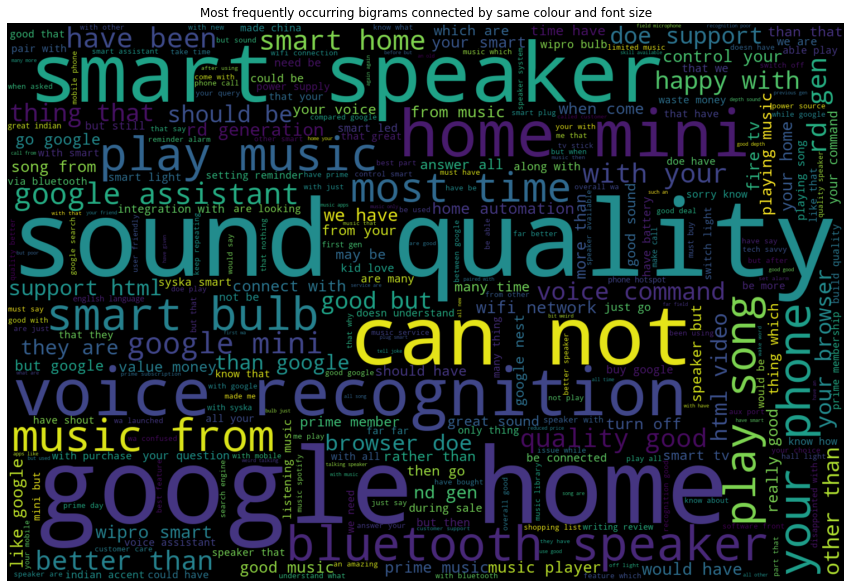

In [79]:
words_dict = dict(word_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 300
wordCloud = WordCloud(max_words = WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We have successfully extracted reviews from Amazon.in. We then removed stop words and special characters from the reviews, we also extended our stopwords to exclude certain words which did not make sense

- We created Unigram wordcloud of all words
- We created Unigram wordcloud of only positive words
- We created Unigram wordcloud of only negative words
- We created Bigram wordcloud of all words. 

We can see that many words are related to browser, would need to deep dive to understand why browser would be used for a watch. Overall generally happy reviews.

## The way Business/client can use this information is as follows:

- Client can see the most common words used by customers when giving feedback on the product
- Top positive words and Top negative words used by customers
- We can deep dive further on negative comments to understand why customers are not happy